# EXPLORING SURVIVAL ON THE TITANIC

In [614]:
# Importing require modules for data analysis and data visualisation
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# This is included as chart created by matplotlib can be shown in the jupyter notebook
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [124]:
# imporing os
#import os 
#print(os.listdir("../input/")) 

In [615]:
# Importing the data sets and loding into dataframe object
train = pd.read_csv("../input/train.csv/train.csv")
test = pd.read_csv("../input/train.csv/test.csv")

In [616]:
# Take a look at the sample training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [617]:
# Take a look at the test data
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [618]:
# Let's look at some more information on data set
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [619]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

**TALK ABOUT THE DATA SET**

The data has split into two groups:
    - training data set (train.csv)
    - test data set (test.csv)
    
The training set includes our target variable(dependent variable), passenger survival (also known as the ground truth 
from the Titanic tragedy) along with other independent features like gender, class, fare, and Pclass.

The test data set should be used to see how well our model performs on unseen data. When we say unseen data, we mean that the 
algorithm or machine learning models have no relation to the test data. We do not want to use any part of the test data in 
any way to modify our algorithms; Which are the reasons why we clean our test data and train data separately. The test set 
does not provide passengers survival status. We are going to use our model to predict passenger survival status.

Now let's go through the features and analyse little more towards model building.....

Categorical:
    Nominal(variables that have two or more categories, but which do not have an intrinsic orde)

        Cabin
        Embarked(Port of Embarkation)
            C(Cherbourg)
            Q(Queenstown) 
            S(Southampton)
    Dichotomous(Nominal variable with only two categories)

        Sex
            Female
            Male
            
    Ordinal(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)
        Pclass (A proxy for socio-economic status (SES))
            1(Upper)
            2(Middle) 
            3(Lower)
            
Numeric:

    Discrete
        Passenger ID(Unique identifing # for each passenger)
        SibSp
        Parch
        Survived (Our outcome or dependent variable)
           0
           1
    Continous
        Age
        Fare
        
    Text Variable
        Ticket (Ticket number for passenger.)
        Name( Name of the passenger.)


# Visualisation Of Data

Let's get better perspective through visualization of dataset and data cleaning

In [620]:
# Let's find the missing value and define a function
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percentage = round(df.isnull().sum().sort_values(ascending=False)/len(df)*100, 2)
    return pd.concat([total, percentage], axis=1, keys=['Total', "Percentage"])

In [621]:
missing_percentage(train)

,Total,Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [622]:
missing_percentage(test)

,Total,Percentage
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [623]:
# Drop unnecessary coloms which won't be useful for analysis and prediction
passengerid = test.PassengerId
train = train.drop(['PassengerId','Name','Ticket'], axis=1)
test = test.drop(['PassengerId','Name','Ticket'], axis=1)

Let's see feature wise missing values

In [624]:
# Analyse "Embarked" feature
# Let's define a function to check feature wise missing values
def percentage_value_counts(df, feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    percent.columns = ['Percent']
    total.columns = ['Total']
    return pd.concat([percent, total], axis=1)

In [625]:
percentage_value_counts(train, "Embarked")

,Percent,Total
S,72.28,644
C,18.86,168
Q,8.64,77
NaN,0.22,2


It looks like only two missing values which have NaN values and we can fill these values with the mode value "S"

In [626]:
# Let's see what are those NaN values
train[train.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B28,NaN
829,1,1,female,62.0,0,0,80.0,B28,NaN


In [627]:
# only in train, fill the two missing values
train["Embarked"] = train["Embarked"].fillna("S")

In [628]:
# Check again sfter filling the null values
percentage_value_counts(train, "Embarked")

,Percent,Total
S,72.50,646
C,18.86,168
Q,8.64,77


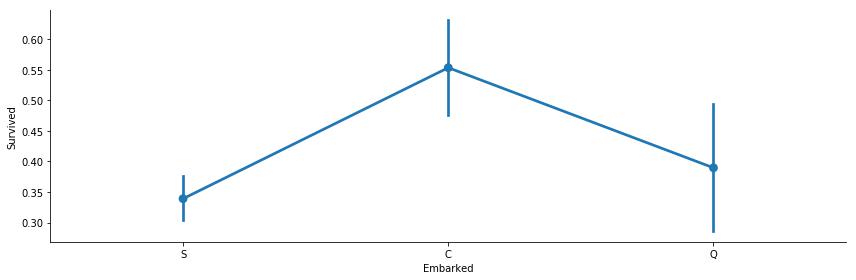

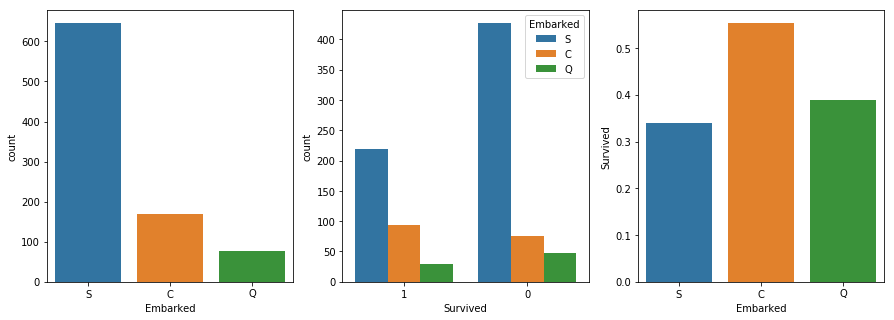

In [629]:
# Visualize the data
sns.factorplot('Embarked','Survived', data=train,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked', data=train, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embarkperc = train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embarkperc,order=['S','C','Q'],ax=axis3)

In [630]:
# Either to consider Embarked column in predictions and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# logically, Embarked doesn't seem to be useful in prediction.

# Let's drop it

train.drop(['Embarked'], axis=1,inplace=True)
test.drop(['Embarked'], axis=1,inplace=True)

In [631]:
# Cecking the missing values in train data set
train[train.Fare.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin


In [632]:
# Checking the missing values for "fare" in test data set
test[test.Fare.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
152,3,male,60.5,0,0,NaN,NaN


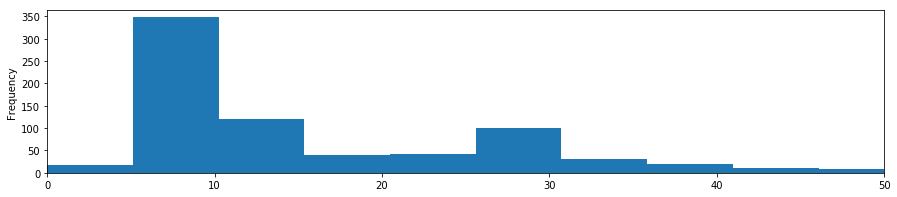

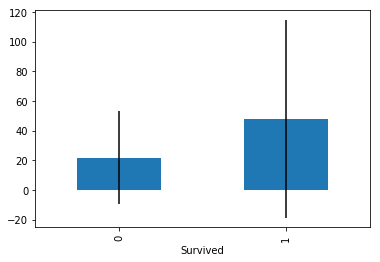

In [633]:
# only for test, since there is a missing "Fare" values
test["Fare"].fillna(test["Fare"].median(), inplace=True)

# convert from float to int
train['Fare'] = train['Fare'].astype(int)
test['Fare'] = test['Fare'].astype(int)

# get fare for survived & didn't survive passengers
fare_not_survived = train['Fare'][train['Survived'] == 0]
fare_survived     = train['Fare'][train['Survived'] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
train['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

In [634]:
# Age

# Missing values for "Age" in train data set
train[train.Age.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
5,0,3,male,NaN,0,0,8,NaN
17,1,2,male,NaN,0,0,13,NaN
19,1,3,female,NaN,0,0,7,NaN
26,0,3,male,NaN,0,0,7,NaN
28,1,3,female,NaN,0,0,7,NaN
29,0,3,male,NaN,0,0,7,NaN
31,1,1,female,NaN,1,0,146,B78
32,1,3,female,NaN,0,0,7,NaN
36,1,3,male,NaN,0,0,7,NaN
42,0,3,male,NaN,0,0,7,NaN


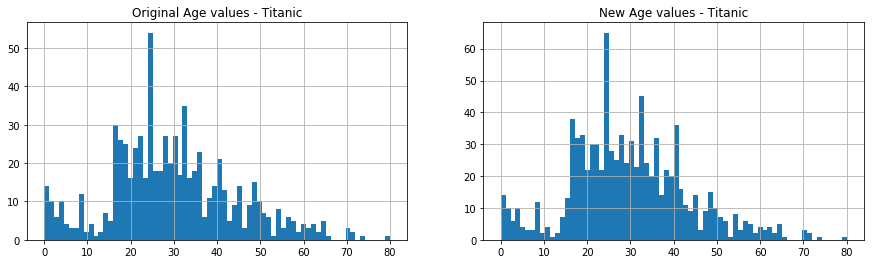

In [635]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# get average, std, and number of NaN values in titanic_df
average_age_train   = train["Age"].mean()
std_age_train       = train["Age"].std()
count_nan_age_train = train["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test["Age"].mean()
std_age_test       = test["Age"].std()
count_nan_age_test = test["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train, size = count_nan_age_train)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# drop all null values, and convert to int
train['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
train["Age"][np.isnan(train["Age"])] = rand_1
test["Age"][np.isnan(test["Age"])] = rand_2

# convert from float to int
train['Age'] = train['Age'].astype(int)
test['Age']    = test['Age'].astype(int)

# plot new Age Values
train['Age'].hist(bins=70, ax=axis2)

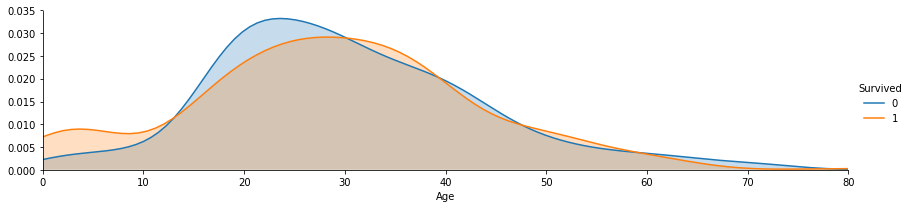

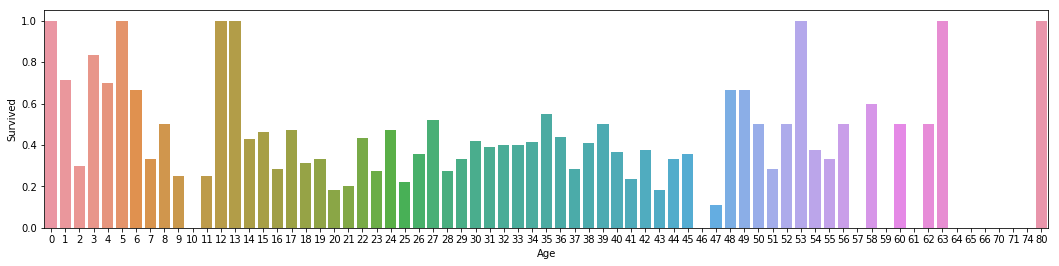

In [636]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [637]:
# Let's explore about "Cabin" attribute

# Missing values for "Cabin" in train data set
train[train.Cabin.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22,1,0,7,NaN
2,1,3,female,26,0,0,7,NaN
4,0,3,male,35,0,0,8,NaN
5,0,3,male,15,0,0,8,NaN
7,0,3,male,2,3,1,21,NaN
8,1,3,female,27,0,2,11,NaN
9,1,2,female,14,1,0,30,NaN
12,0,3,male,20,0,0,8,NaN
13,0,3,male,39,1,5,31,NaN
14,0,3,female,14,0,0,7,NaN


In [638]:
# Cabin attribute has lots of null values and it will not have good contribution to analysis
# Let's drop this coloum
train.drop("Cabin", axis=1, inplace=True)
test.drop("Cabin", axis=1, inplace=True)

In [639]:
# "Family" : Let's explore about Parch and Sibsp features

# Combine the two columns Parch & SibSp to "Family"
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
train['Family'] =  train["Parch"] + train["SibSp"]
train['Family'].loc[train['Family'] > 0] = 1
train['Family'].loc[train['Family'] == 0] = 0

test['Family'] =  test["Parch"] + test["SibSp"]
test['Family'].loc[test['Family'] > 0] = 1
test['Family'].loc[test['Family'] == 0] = 0

# drop Parch & SibSp
train = train.drop(['SibSp','Parch'], axis=1)
test    = test.drop(['SibSp','Parch'], axis=1)

[Text(0, 0, 'With Family'), Text(0, 0, 'Alone')]

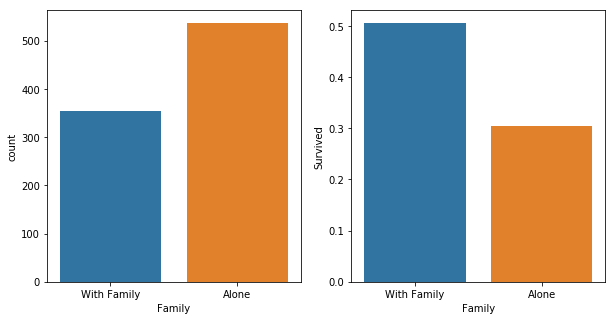

In [640]:
# Let's visualize the data and plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

sns.countplot(x='Family', data=train, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = train[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

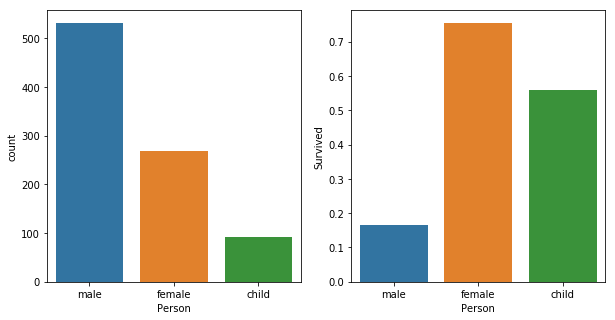

In [641]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
train['Person'] = train[['Age','Sex']].apply(get_person,axis=1)
test['Person']    = test[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_train  = pd.get_dummies(train['Person'])
person_dummies_train.columns = ['Child','Female','Male']
person_dummies_train.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

train = train.join(person_dummies_train)
test    = test.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

#sns.factorplot('Person',data=train,kind='count',ax=axis1)
sns.countplot(x='Person', data=train, ax=axis1)

#average of survived for each Person(male, female, or child)
person_perc = train[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

train.drop(['Person'],axis=1,inplace=True)
test.drop(['Person'],axis=1,inplace=True)

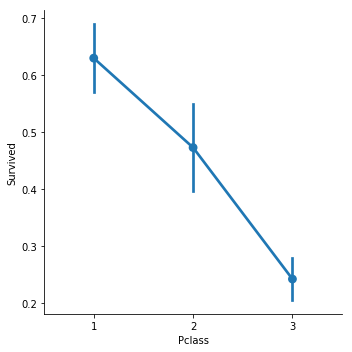

In [642]:
# Pclass: Let's exploe about "Pclass" feature

sns.factorplot('Pclass','Survived',order=[1,2,3], data=train,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_train  = pd.get_dummies(train['Pclass'])
pclass_dummies_train.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_train.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

train.drop(['Pclass'],axis=1,inplace=True)
test.drop(['Pclass'],axis=1,inplace=True)

train = train.join(pclass_dummies_train)
test    = test.join(pclass_dummies_test)

We are almost done with data preparation and data cleaning
Let's prepare the model

In [643]:
# Lets recall our data after cleaning
# training data
train.head()

,Survived,Age,Fare,Family,Child,Female,Class_1,Class_2
0,0,22,7,1,0,0,0,0
1,1,38,71,1,0,1,1,0
2,1,26,7,0,0,1,0,0
3,1,35,53,1,0,1,1,0
4,0,35,8,0,0,0,0,0


In [644]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Age         891 non-null int32
Fare        891 non-null int32
Family      891 non-null int64
Child       891 non-null uint8
Female      891 non-null uint8
Class_1     891 non-null uint8
Class_2     891 non-null uint8
dtypes: int32(2), int64(2), uint8(4)
memory usage: 24.4 KB


In [645]:
# test set
test.head()

,Age,Fare,Family,Child,Female,Class_1,Class_2
0,34,7,0,0,0,0,0
1,47,7,1,0,1,0,0
2,62,9,0,0,0,0,1
3,27,8,0,0,0,0,0
4,22,12,1,0,1,0,0


In [646]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Age        418 non-null int32
Fare       418 non-null int32
Family     418 non-null int64
Child      418 non-null uint8
Female     418 non-null uint8
Class_1    418 non-null uint8
Class_2    418 non-null uint8
dtypes: int32(2), int64(1), uint8(4)
memory usage: 8.2 KB


In [647]:
# Define training and test set
X = train.drop("Survived",axis=1)
y = train["Survived"]

In [648]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

In [649]:
headers = X_train.columns 

X_train.head()

,Age,Fare,Family,Child,Female,Class_1,Class_2
242,29,10,0,0,0,0,1
344,36,13,0,0,0,0,1
170,61,33,0,0,0,1,0
187,45,26,0,0,0,1,0
800,34,13,0,0,0,0,1


In [650]:
# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
X_train = sc.fit_transform(X_train)

## transforming "test_x"
X_test = sc.transform(X_test)

## transforming "The testset"
test = sc.transform(test)

In [651]:
# after Scaling
pd.DataFrame(X_train, columns=headers).head()

,Age,Fare,Family,Child,Female,Class_1,Class_2
0,-0.051669,-0.456629,-0.803996,-0.334575,-0.64473,-0.577350,1.931362
1,0.469013,-0.394532,-0.803996,-0.334575,-0.64473,-0.577350,1.931362
2,2.328589,0.019449,-0.803996,-0.334575,-0.64473,1.732051,-0.517769
3,1.138460,-0.125444,-0.803996,-0.334575,-0.64473,1.732051,-0.517769
4,0.320247,-0.394532,-0.803996,-0.334575,-0.64473,-0.577350,1.931362


In [652]:
# Lets prepare the model - Logistic Regression
# Get the instance of the Logistic regression
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predict the model
Y_pred = logreg.predict(X_test)

logreg.score(X_train, y_train)

0.8036912751677853

In [653]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import accuracy_score

# Let's check the accuracy score of our default model
accuracy_score(Y_pred, y_test)

0.7728813559322034

In [654]:
# Let's predict the model  using Support Vector Machine
# Model with the best value of C
svc = SVC(C=10)

# Train the model
svc.fit(X_train, y_train)

# Predict the model
Y_prediction = svc.predict(X_test)

svc.score(X_train, y_train)

0.8355704697986577

In [655]:
# Let's check the accuracy score of our default model
accuracy_score(y_test,Y_prediction )

0.8169491525423729

In [656]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)

Y_predi = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

0.9580536912751678

In [657]:
# Let's check the accuracy score of our default model
accuracy_score(y_test,Y_predi)

0.8101694915254237

In [658]:
# Submit test prediction
all_models = [logreg, svc, random_forest]

c = {}
for i in all_models:
    a = i.predict(X_test)
    b = accuracy_score(a, y_test)
    c[i] = b

In [660]:
test_prediction = (max(c, key=c.get)).predict(test)
submission = pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": test_prediction
    })

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic_submission.csv", index=False)